<a href="https://colab.research.google.com/github/datasith/ML-Notebooks-TensorFlow/blob/main/Intro_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Gentle Introduction to TensorFlow

In our previous TensorFlow [notebook](https://colab.research.google.com/github/datasith/ML-Notebooks-TensorFlow/blob/main/TensorFlow_Hello_World.ipynb), we learned about how to get started quickly using Google Colab. In this tutorial, we are going to take a step back and review some of the basic components of building a deep learning model using TensorFlow. 

This will be a brief tutorial and will avoid using jargon and overcomplicated code. That said, this is perhaps the most basic of models you can build with TensorFlow. 

If fact, it is so basic that it's ideal for those starting to learn about TensorFlow and Deep Learning. So if you have a friend or colleague who wants to jump in, I highly encourage you to refer them to this tutorial as a starting point. Let's get started!

---
**Author:** Cisco Zabala ([@datasith](https://twitter.com/datasith) | [LinkedIn](https://www.linkedin.com/in/datasith/) | [Kaggle](https://kaggle.com/thedatasith) | [GitHub](https://github.com/datasith))

*Based on the work by Elvis Saravia ([Twitter](https://twitter.com/omarsar0) | [LinkedIn](https://www.linkedin.com/in/omarsar/)) on GitHub: [ML Notebooks](https://github.com/dair-ai/ML-Notebooks)*

# Getting Started

We need to import a few modules which will be useful to obtain the necessary libraries that will help us to build our deep learning model. The main ones are `tensorflow` and `keras` (now part of the `tensorflow` module). They contain the majority of the functions that we need to get started with TensorFlow. As this is a Deep Learning tutorial, we will need additional modules that are part of the aforementioned libraries, thus we'll use the typical `tf.*.module_name` usage to incorporate their functionality in our notebook.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import seaborn as sns
import tensorflow as tf
import tensorflow.keras as keras

from PIL import Image

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


# Loading the Data
Let's get right into it! As with any machine learning project, you need to load your dataset. We are using the [MNIST dataset](http://yann.lecun.com/exdb/mnist/), which is the Hello World of datasets in the machine learning world. 

It comprises 70,000 images of single digits, where each image is `28 x 28` pixels of resolution. We will discuss the images shortly, but our plan is to load data into batches of 32 images each, as depicted in the figure below.

[<img src="https://github.com/datasith/ML-Notebooks-TensorFlow/blob/main/img/A_Gentle_Introduction_to_TensorFlow/batches.png?raw=true" width="600"/>](https://github.com/datasith/ML-Notebooks-TensorFlow/blob/main/img/A_Gentle_Introduction_to_TensorFlow/batches.png?raw=true)

Here are the complete steps we are performing when importing our data:
- We will import the data into tensors using the `Keras` built-in `load_data()` method
- We will use the `from_tensor_slices()` method from the `Dataset` class to build convenient iterable objects that contain the data, which makes it easy to efficiently batch the data for use with Deep Learning models
- The data batches will consist of `32` images each. Note that this works perfectly for the *training set*, `1875` batches. But, for the test set, the code automatically generates `312` batches with `32` images each, and one with `16`.

In [ ]:
# Batch size parameter
BATCH_SIZE = 32

# The built-in load_data() method in the keras datasets module takes care of 
# some of the hard work behind the scenes. Namely, splitting our dataset into 
# test and train sets of images and labels
train, test = tf.keras.datasets.mnist.load_data()

images, labels = train
images = images/255.0
labels = labels.astype(np.int32)

# Using the from_tensor_slices() method in the class, we turn the loaded data
# into tensors as needed by the model we'll build
mnist_ds = tf.data.Dataset.from_tensor_slices((images, labels))
train_len = len(mnist_ds)*8 // 10
val_len = len(mnist_ds) - train_len

mnist_train_ds = mnist_ds.take(train_len)
mnist_train_ds = mnist_train_ds.shuffle(2000, seed=42).batch(BATCH_SIZE)

mnist_val_ds = mnist_ds.skip(train_len)
mnist_val_ds = mnist_val_ds.shuffle(2000, seed=42).batch(BATCH_SIZE)

# assert sum(1 for _ in mnist_train_ds) == np.ceil( images.shape[0] / BATCH_SIZE )

# We follow the same procedure for our test images than we did for our training 
# ones
images, labels = test
images = images/255.0
labels = labels.astype(np.int32)

mnist_test_ds = tf.data.Dataset.from_tensor_slices((images, labels))
mnist_test_ds = mnist_test_ds.shuffle(2000, seed=42).batch(BATCH_SIZE)

# assert sum(1 for _ in mnist_test_ds) == np.ceil( images.shape[0] / BATCH_SIZE )

In [ ]:
len(mnist_val_ds)

375

Together with a couple of assertion checks, we can print out the contents of our data iterators to ensure we are getting what we expect.

In [ ]:
# print info about the trainomg and testing datasets
print(mnist_train_ds, f'| Batches: {sum(1 for _ in mnist_train_ds)} of {BATCH_SIZE} or fewer (on the last one) elements')
print(mnist_val_ds, f'| Batches: {sum(1 for _ in mnist_val_ds)} of {BATCH_SIZE} or fewer (on the last one) elements')
print(mnist_test_ds,  f'| Batches: {sum(1 for _ in mnist_test_ds)} of {BATCH_SIZE} or fewer (on the last one) elements' )

<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> | Batches: 1500 of 32 or fewer (on the last one) elements
<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> | Batches: 375 of 32 or fewer (on the last one) elements
<BatchDataset element_spec=(TensorSpec(shape=(None, 28, 28), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))> | Batches: 313 of 32 or fewer (on the last one) elements


In the code above, we used a series of *variables* and *methods* to manipulate the data in our dataset.
- `BATCH_SIZE` is a parameter that denotes the batch size we will use for our model
- `load_data()` loads our images and labels data already split into  test and train sets
- `from_tensor_slices()` helped us turn the loaded data into tensors as needed by the model we'll build

In the code below, we can explore the different methods built into TensorFlow for generating arrays, and turning them into images that we can visualize.
- `array_to_img()` is a method part of the `keras.preprocessing.image` pipeline, which converts a random array of values into a readable input to the standrd Python library `PIL`.

In [ ]:
image = tf.random.Generator.from_seed(42)
image_tensor = image.normal(shape=(96, 96, 1))
image_tensor = tf.truediv(
   tf.subtract(
      image_tensor, 
      tf.reduce_min(image_tensor)
   ), 
   tf.subtract(
      tf.reduce_max(image_tensor), 
      tf.reduce_min(image_tensor)
   )
)
image = tf.keras.preprocessing.image.array_to_img(image_tensor)

Using the typical `matplotlib.pytplot.imshow()` method, we can visualize the random image we created.

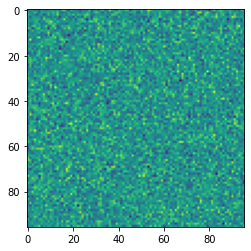

In [ ]:
_ = plt.imshow(image)

Now that we have our image sample, we can apply different transformations. The most straightforward way is by installing the `tensorflow_addons` library.

Reference: 
* https://www.tensorflow.org/addons/tutorials/image_ops

In [ ]:
!pip install -q -U tensorflow-addons

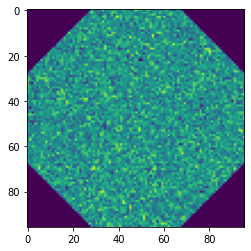

In [ ]:
# dummy transformation
import tensorflow_addons as tfa

rotate = tfa.image.rotate(image_tensor, tf.constant(np.pi/4))
image = tf.keras.preprocessing.image.array_to_img(rotate)
_ = plt.imshow(image)

We can concatenate multiple operations with those defined in the `tensorflow_addons` library. Let's try both a rotation and a flip this time:

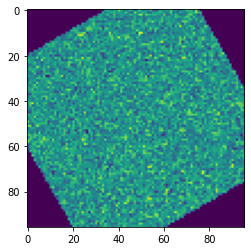

In [ ]:
## dummy transform 
rotate = tfa.image.rotate(image_tensor, tf.constant(np.pi/3))
flip = tf.image.flip_left_right(rotate)
image = tf.keras.preprocessing.image.array_to_img(flip)
_ = plt.imshow(image)

That's pretty cool right! Keep trying other transform methods. On the topic of exploring our data further, let's take a look at our images dataset.

# Exploring the Data
As a practioner and researcher, I am always spend a bit of time and effort exploring and understanding my datasets. It's fun and this is a good practise to ensure that everything is in order.

Let's check what the train and test dataset contain. I will use `matplotlib` and `numpy` to visualize some of the images from our dataset. Using the code below, I'm able to visualize an entire batch of images from the `MNIST` dataset.

In [ ]:
images.shape

(10000, 28, 28)

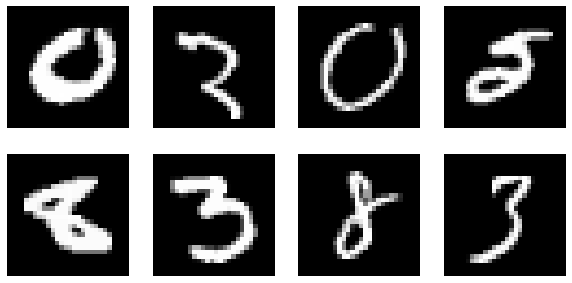

In [ ]:
plt.figure(figsize=(10, 5))
for images, labels in mnist_train_ds.take(1):
  for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.axis("off")

The dimensions of our batches are as follow:

In [ ]:
for image_batch, labels_batch in mnist_train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 28, 28)
(32,)


# The Model
Now it's time to build a Deep Learning model that we'll use for Image Classification. We'll keep things simple and stack a few dense layers and a dropout layer to train our model.

- The simplest way to build a model in TensorFlow is by using the `Sequential` class, and adding `layers` to it:

```python
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28, 28, 1)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  ...
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
```

The [Sequential](https://www.tensorflow.org/guide/keras/sequential_model) model consists of three convolution blocks (`tf.keras.layers.Conv2D`) with a max pooling layer (`tf.keras.layers.MaxPooling2D`) in each of them. There's a fully-connected layer (`tf.keras.layers.Dense`) with 128 units on top of it that is activated by a ReLU activation function (`'relu'`). This model has not been tuned for high accuracy—the goal of this tutorial is to show a standard approach.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28, 28, 1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10)
])

The following is a diagram of a typical Deep Learning model architecture. The difference between a Deep Learning model and the one we have built, is that ours contains only a single hidden layer—a shallow network. It's also worth hoting that our single hidden layer is much bigger than those shown in the diagram (contains 784 neurons). Similarly, the output layer contains 10 neurons, and the input layer tens of thousands of 28x28x1-shaped tensors representing our grayscale images.

[<img src="https://github.com/datasith/ML-Notebooks-TensorFlow/blob/main/img/A_Gentle_Introduction_to_TensorFlow/model.png?raw=true" width="600"/>](https://github.com/datasith/ML-Notebooks-TensorFlow/blob/main/img/A_Gentle_Introduction_to_TensorFlow/model.png?raw=true)

*Source: https://www.ibm.com/cloud/learn/neural-networks*

As done in previous tutorials, it's typically best to test the model with 1 batch to ensure that the output dimensions are what we expect. Notice how we are iterating over the dataloader which conveniently stores the `images` and `labels` pairs. `out` contains the output of the model, which are the logits applied a `softmax` layer which helps with prediction. 

In [ ]:
# Test the model with 1 batch

for images, labels in mnist_train_ds.take(1):
    print("batch size:", images.shape)
    out = model(images)
    print(out.shape)
    break

batch size: (32, 28, 28)
(32, 10)


We can clearly see that we get back the batches with 10 output values associate with it. These are used to compute the performance of the model.

---

## Training the Model
Now we are ready to train the model but before that we are going to setup a loss function, an optimizer and a function to compute accuracy of the model. 

- The `learning_rate` is the rate at which the model will try to optimize its weights
- `num_epochs` is the number of times we use the _entire_ training set (if we put it in patches, each epoch will consist of a series of steps—one step per batch)
- `get_visible_devices()` determines what hardware is available to train the model. We can select from the list whether to use a `cpu`, `gpu`, or `tpu` when available
- `model` is just the model instance.
- `device()` allows us to execute operations on a specific device
- `criterion` is just the metric that's used to compute the loss of the model while it forward and backward passes to optimize the weights
- `optimizer` is the optimization technique used to modify the weights in the backpropagation


In [ ]:
tf.config.get_visible_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
learning_rate = 0.001
num_epochs = 10

criterion = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

Finally, we can use the built-in metrics to get the performance of our model with the training and validation sets.

In [ ]:
metrics = ['accuracy']

## Training the Model

With the model defined, our loss and optimization functions set up, and our metrics configured, we're ready to train the model!

- The first thing we need to do is put all the pieces together and build our model, to do that we use the `compile` method
- We use `model.summary()` to double-check that the model architecture is as we inteded it to be

In [ ]:
model.compile(
    loss=criterion, 
    optimizer=optimizer, 
    metrics=metrics,
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


- We use a couple of callback functions for specifying actions during training:
    - One for reducing the learning rate under certain criteria
    - Another for stopping traing altogether even before going through all epochs

In [ ]:
early_stop_cb = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
    )

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=0.000001)

- We can specify the hardware device in which we want to train our model with the `tf.device()` method
- `model.train()` explicitly starts training, and it includes our callbacks as arguments
- We iterate over the `BatchDataset` object, which "automagically" gives the training loop batches of image-label pairs
- `loss` and `accuracy` are accumulated from one epoch to the next, and totals are stored in `history`
- We use the values stored in `history` to determine whether or not the model is learning properly (vs. underfitting or overfitting the data)

In [ ]:
with tf.device('/device:GPU:0'):
    history = model.fit(
        mnist_train_ds,
        epochs=num_epochs,
        validation_data=mnist_val_ds, 
        callbacks = [early_stop_cb, reduce_lr]
    )

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2804 - accuracy: 0.9203 - val_loss: 0.1525 - val_accuracy: 0.9578 - lr: 0.0010
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1263 - accuracy: 0.9628 - val_loss: 0.1187 - val_accuracy: 0.9644 - lr: 0.0010
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0865 - accuracy: 0.9747 - val_loss: 0.1084 - val_accuracy: 0.9687 - lr: 0.0010
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0645 - accuracy: 0.9813 - val_loss: 0.1136 - val_accuracy: 0.9662 - lr: 0.0010
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0492 - accuracy: 0.9854 - val_loss: 0.0989 - val_accuracy: 0.9718 - lr: 0.0010
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0391 - accuracy: 0.9883 - val_loss: 0.0978 - val_accuracy: 0.9706 - lr: 0.0010
Epoch 7/10
1500/1500 [==============================] - 5s

After all the training steps are over, we can clearly see that the loss keeps decreasing while the training accuracy of the model keeps rising, which is a good sign that the model is effectively learning to classify images.

We can verify that by computing the accuracy on the testing dataset to see how well the model performs on the image classificaiton task. As you can see below, our basic CNN model is performing very well on the MNIST classification task.

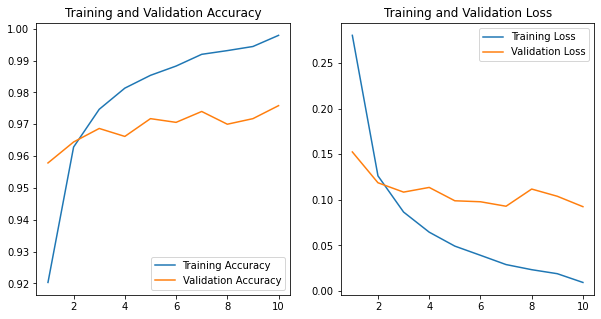

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1,num_epochs+1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The graphs allows us to see that while our performance in the training set improves over the 10 epochs, our validation accuracy remains close to constant. This is a good indicator that we're overfitting our model to the training data. A simple way to tackle it is to add a `Dropout` layer (or reduce the number of neurons), re-compile, re-train, and re-evaluate. 

Give it a try by including the commented-out layer in the model definition!

## Final Words

Congratulations! You have made it to the end of this tutorial. This is a really long tutorial that aims to give an very basic introduction to the fundamentals of image classification using neural networks and TensorFlow.

*This tutorial was heavily inspired by this [TensorFlow tutorial.](https://www.tensorflow.org/beta/tutorials/quickstart/beginner) We thank the authors of the corresponding reference for their valuable work.*

## References
- [Get started with TensorFlow 2.0 for beginners](https://www.tensorflow.org/beta/tutorials/quickstart/beginner)
-[ Neural Networks with PyTorch](https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py)